Group: Vincent Ventura (302810), Oliver Sorrentino (341207), Jules Herrscher (341732)


***Question 0:***

The function given to us in the assignment can be strongly reduced. Step by step, we find that the function is logically equivalent to $$f(x_0, x_1, x_2, x_3, x_4) = (\neg x_1 \land \neg x_2 \land x_3 \land \neg x_4) \lor (\neg x_0 \land \neg x_2 \land x_3 \land \neg x_4)$$


The function takes value 1 for the following 3 inputs : $(0, 0, 0, 1, 0), (0, 1, 0, 1, 0), (1, 1, 0, 1, 0)$

***Question 1:***


Since there are fives $x_i$'s, and 6 clauses, and we will need a qubit for each of them, plus the final ancilla qubit that will take the xor of itself with the whole addition, we will need 12 qubits. We prepare the circuit with a Hadamard gate for all the qubits that are going to be our input, i.e. the first 5 qubits.

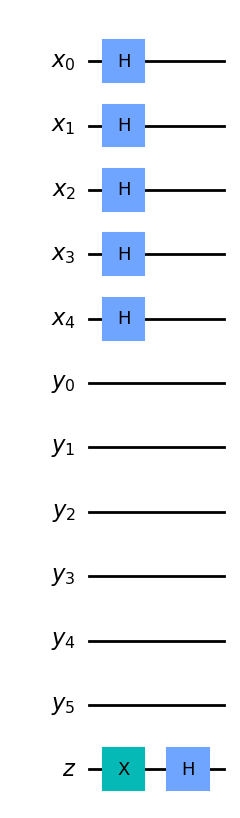

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_x = QuantumRegister(5, 'x')
qreg_y = QuantumRegister(6, 'y')
qreg_z = QuantumRegister(1, 'z')
circuit = QuantumCircuit(qreg_x, qreg_y, qreg_z)

circuit.h(qreg_x[0])
circuit.h(qreg_x[1])
circuit.h(qreg_x[2])
circuit.h(qreg_x[3])
circuit.h(qreg_x[4])
circuit.x(qreg_z[0])
circuit.h(qreg_z[0])
circuit.draw('mpl')

In [2]:
Prep = QuantumCircuit(12, name='Prep')
Prep.h(0)
Prep.h(1)
Prep.h(2)
Prep.h(3)
Prep.h(4)
Prep.x(11)
Prep.h(11)


***Question 2:***

The first clause $(\neg x_0 \lor x_1)$ becomes $\neg(x_0 \land \neg x_1)$. Therefor we need to invert $x_1$ and then we will use a CCNOT to bind this to $y_0$

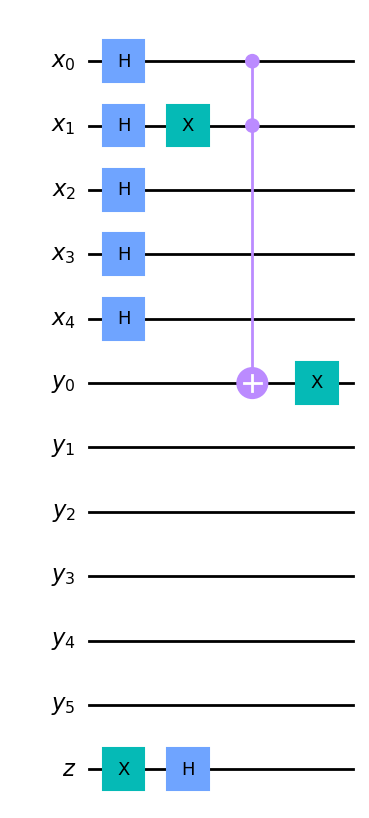

In [3]:
circuit.x(qreg_x[1])
circuit.mcx(qreg_x[0:2], qreg_y[0])
circuit.x(qreg_y[0])
circuit.draw('mpl')

The second clause, $(x_0 \lor x_1 \lor \neg x_2)$ becomes $\neg(\neg x_0 \land \neg x_1 \land x_2)$. We proceed analogously to the first clause on the circuit

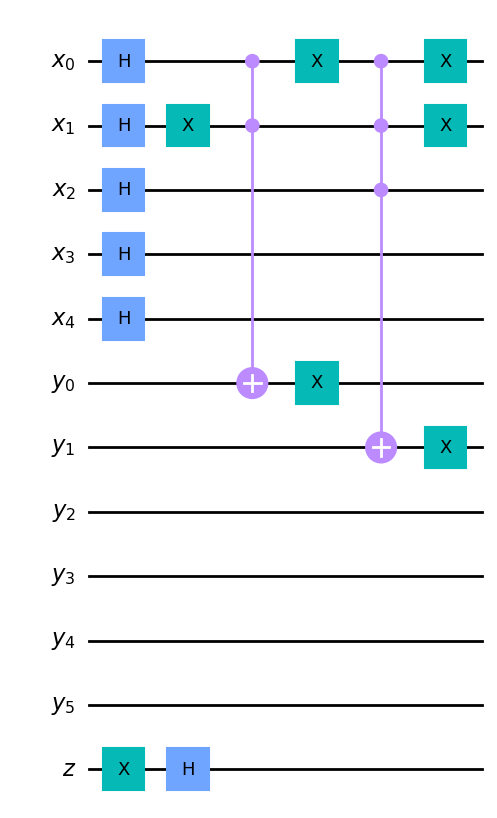

In [4]:
circuit.x(qreg_x[0])
circuit.mcx(qreg_x[0:3], qreg_y[1])
circuit.x(qreg_x[0])
circuit.x(qreg_x[1])
circuit.x(qreg_y[1])
circuit.draw('mpl')

The third clause transform as $(x_2 \lor x_3) \rightarrow \neg(\neg x_2 \land \neg x_3)$

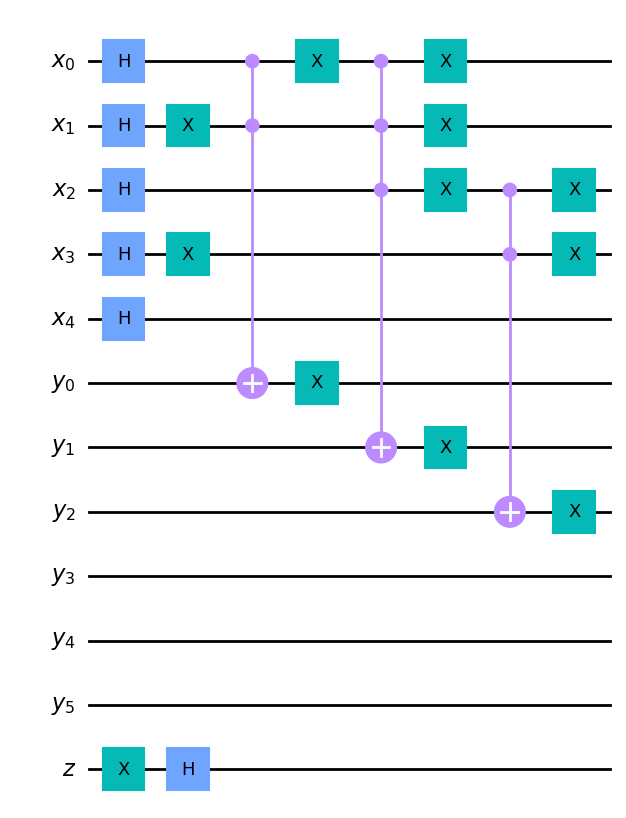

In [5]:
circuit.x(qreg_x[2])
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[2:4], qreg_y[2])
circuit.x(qreg_x[2])
circuit.x(qreg_x[3])
circuit.x(qreg_y[2])
circuit.draw('mpl')

4th clause: $(\neg x_1 \lor \neg x_2 \lor x_3) \rightarrow \neg(x_1 \land x_2 \land \neg x_3)$

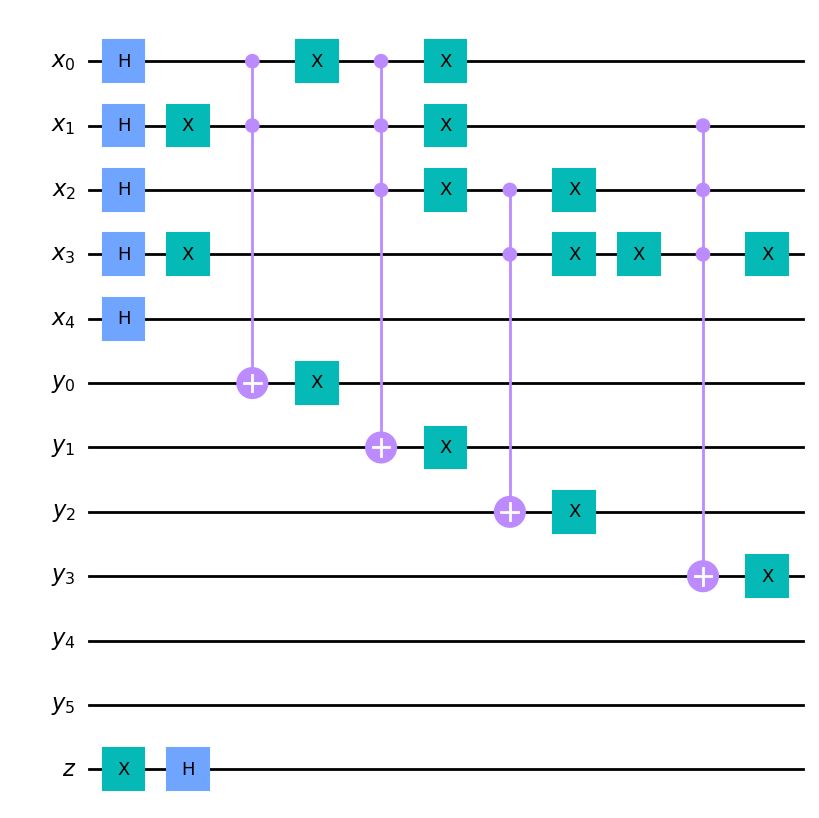

In [6]:
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[1:4], qreg_y[3])
circuit.x(qreg_x[3])
circuit.x(qreg_y[3])
circuit.draw('mpl')

5th clause : $(\neg x_3 \lor \neg x_4) \rightarrow \neg(x_3 \land x_4)$

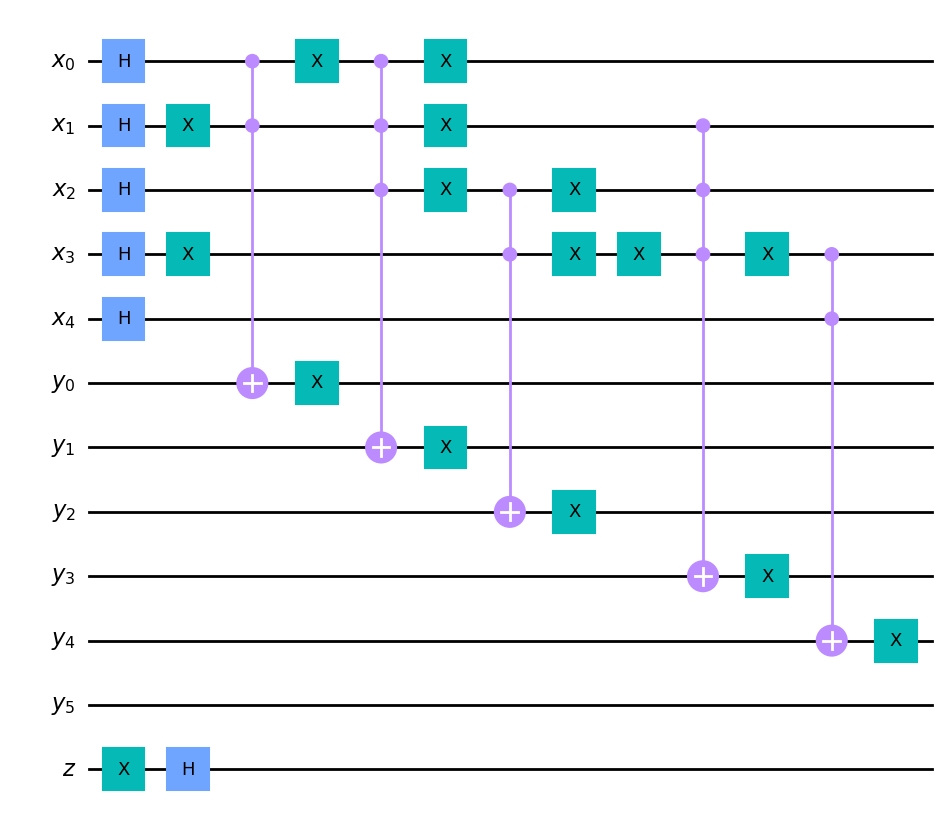

In [7]:
circuit.mcx(qreg_x[3:5], qreg_y[4])
circuit.x(qreg_y[4])
circuit.draw('mpl')

6th clause : $(\neg x_2 \lor \neg x_3 \lor x_4) \rightarrow \neg(x_2 \land x_3 \land \neg x_4)$

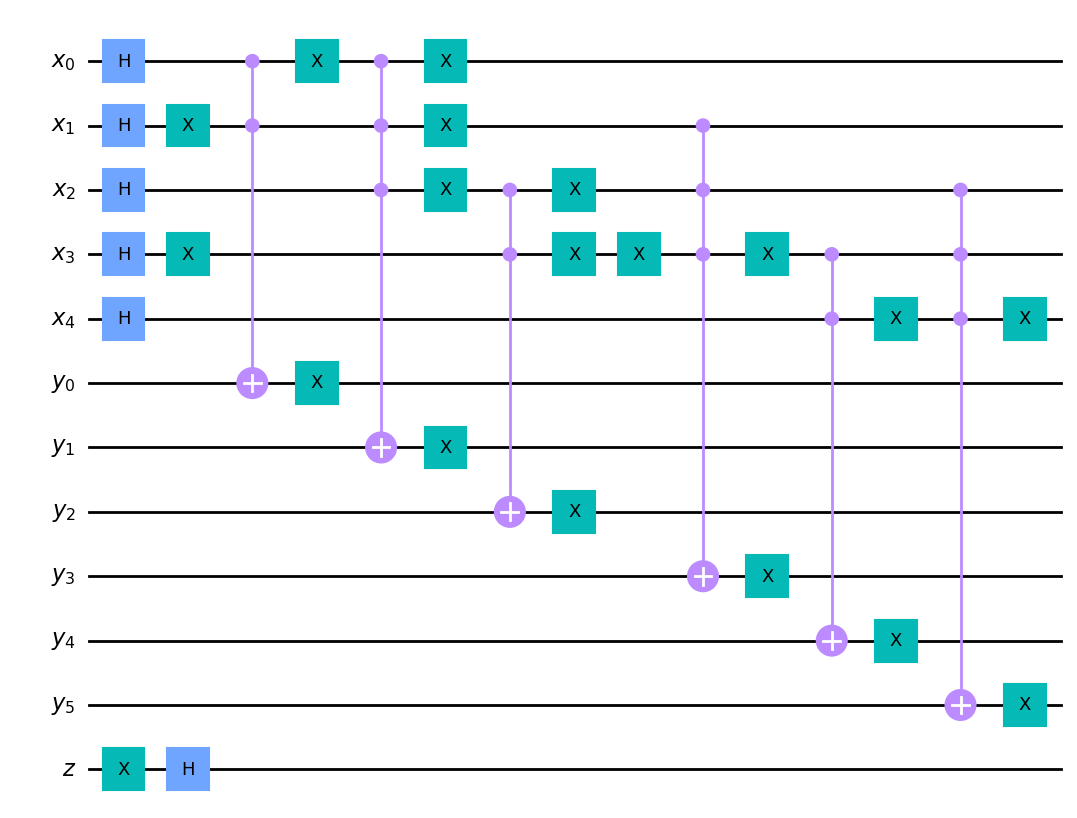

In [8]:
circuit.x(qreg_x[4])
circuit.mcx(qreg_x[2:5], qreg_y[5])
circuit.x(qreg_x[4])
circuit.x(qreg_y[5])
circuit.draw('mpl')

Now we use a multicontrol not of all 6 $y_i$'s onto z

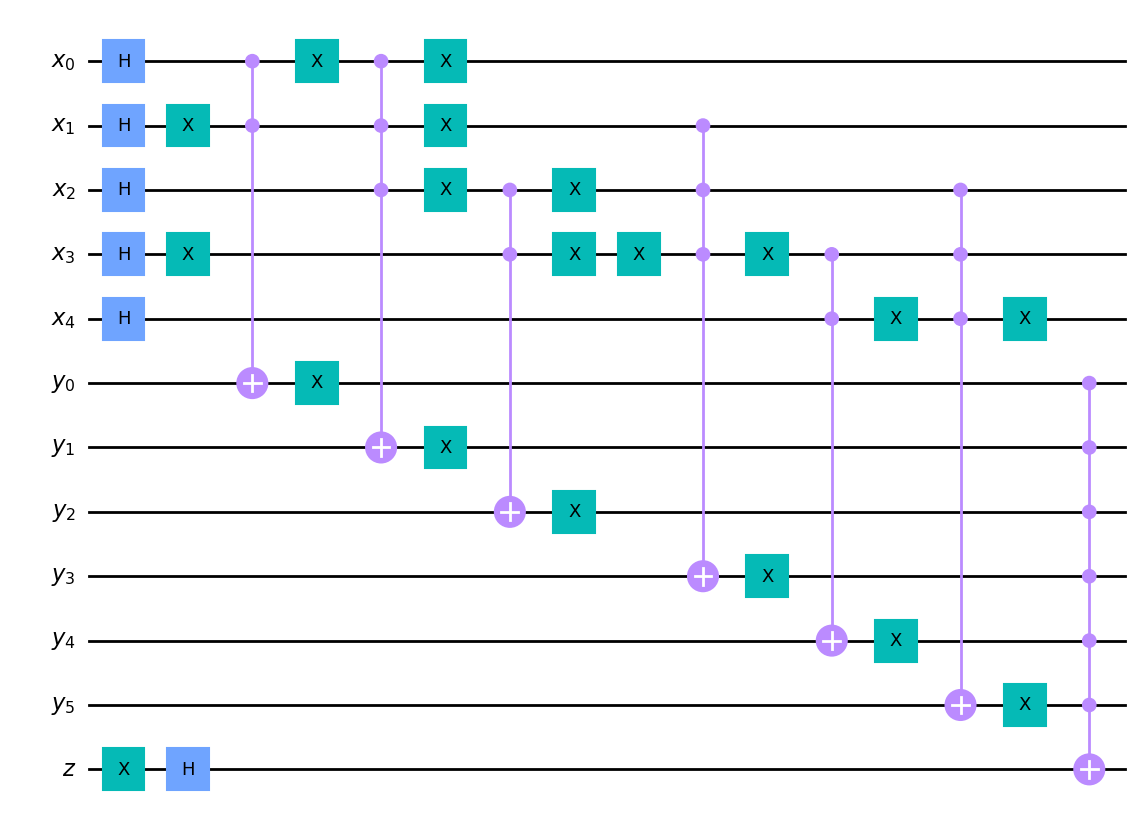

In [9]:
circuit.mcx(qreg_y[0:6], qreg_z[0])
circuit.draw('mpl')

Now we need to go back on all registers except for the z one to return to normal state. This can be achieved by merely applying the same gates again to the same bits, as both the X and the multicontrol not gate are their own inverse. We can do this all in one in the next cell.

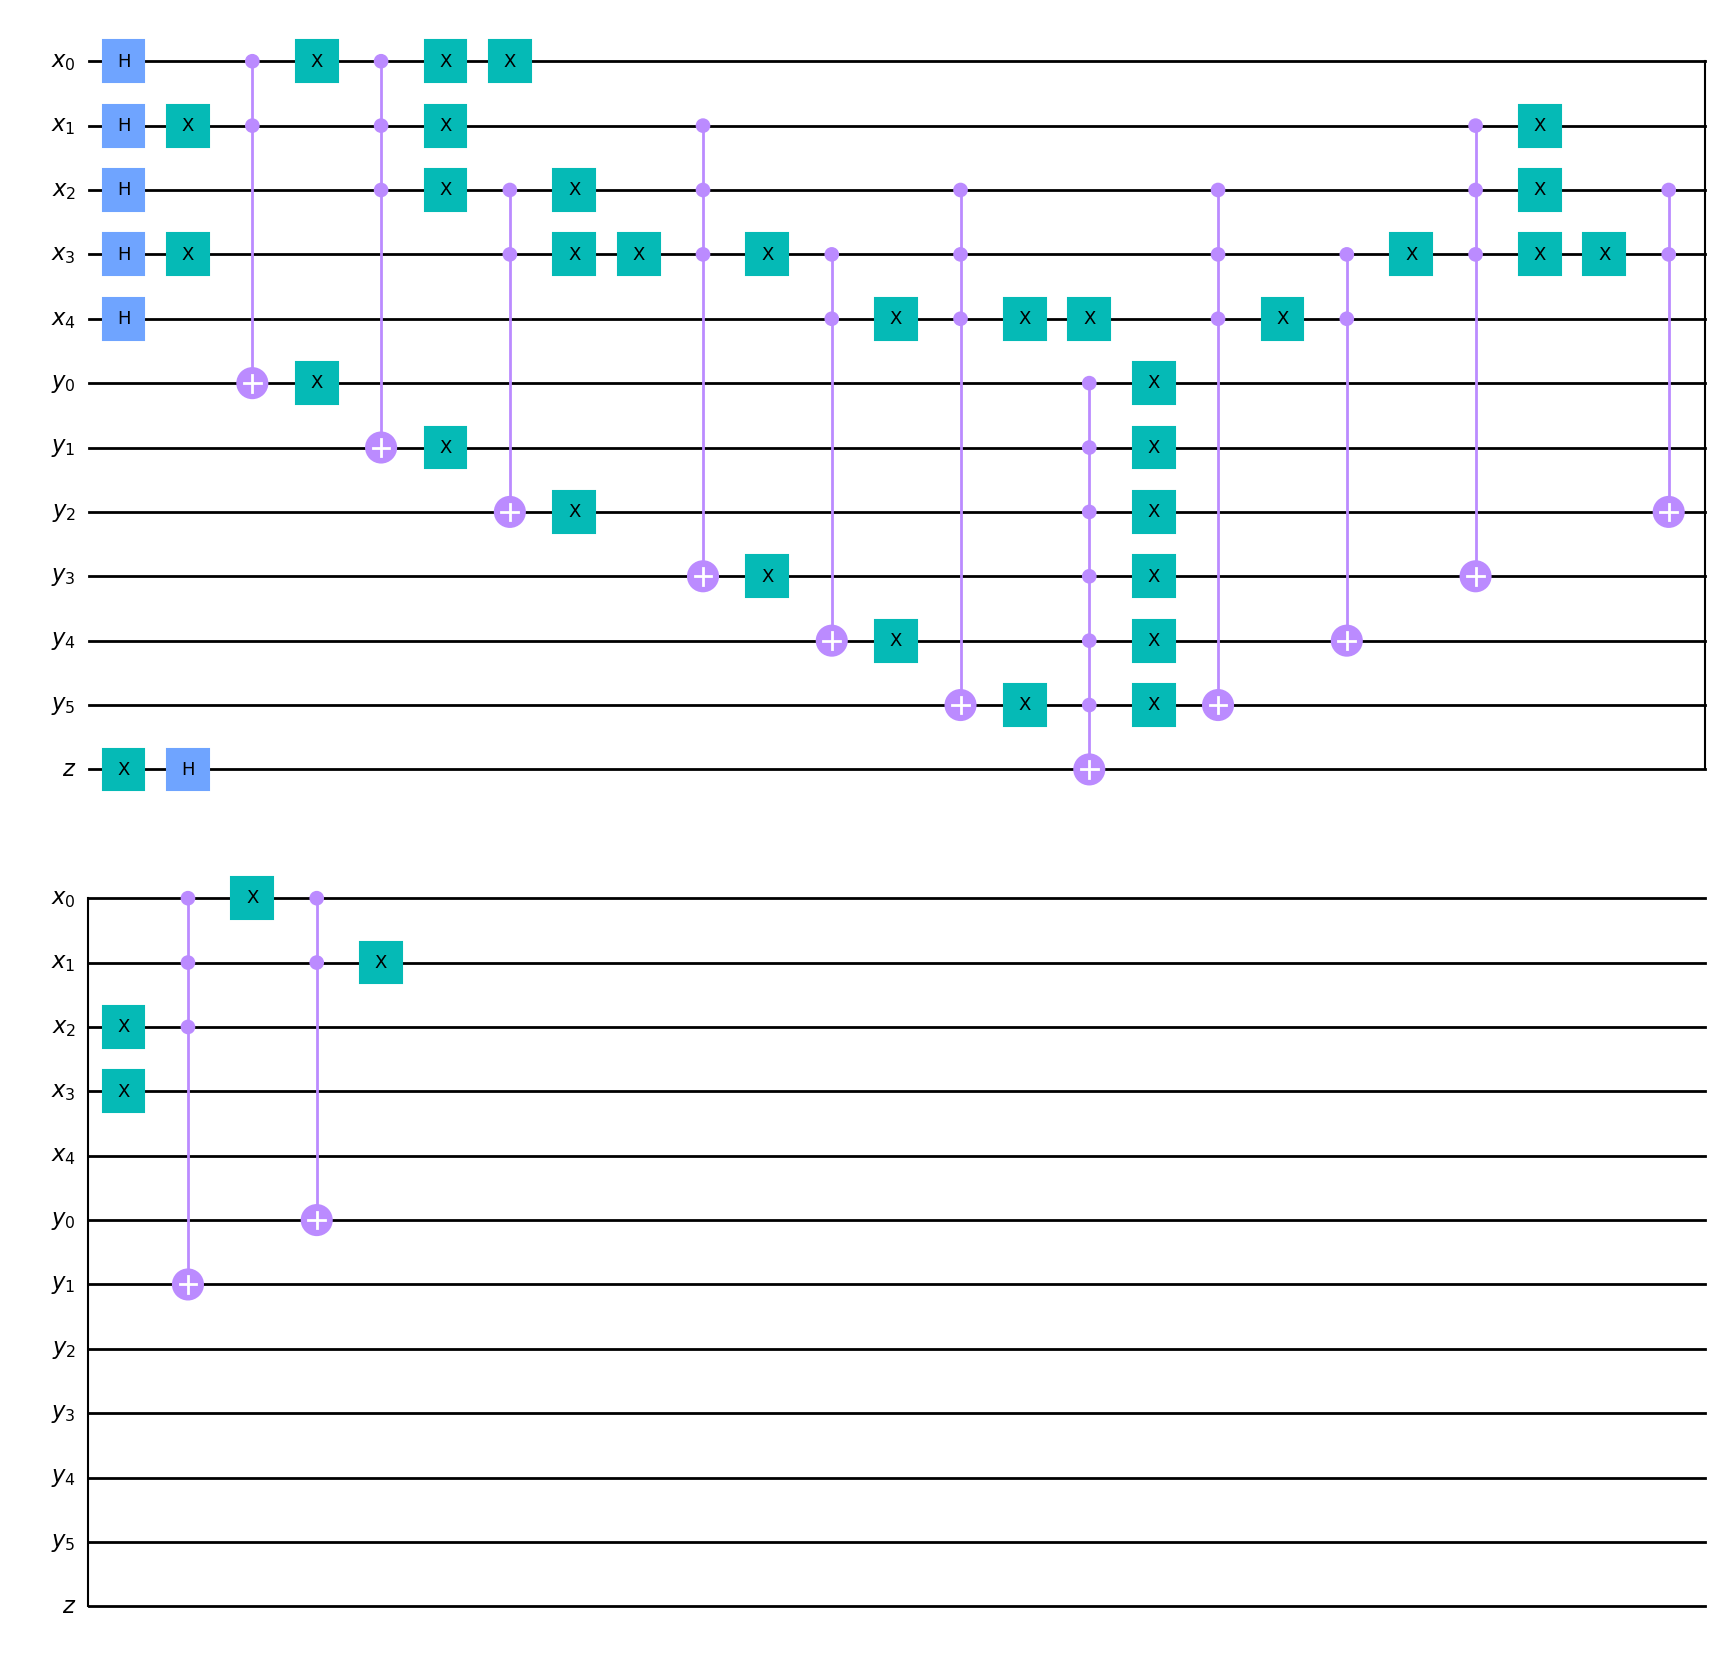

In [10]:
circuit.x(qreg_y[5])
circuit.x(qreg_x[4])
circuit.mcx(qreg_x[2:5], qreg_y[5])
circuit.x(qreg_x[4])
circuit.x(qreg_y[4])
circuit.mcx(qreg_x[3:5], qreg_y[4])
circuit.x(qreg_y[3])
circuit.x(qreg_x[3])
circuit.mcx(qreg_x[1:4], qreg_y[3])
circuit.x(qreg_x[3])
circuit.x(qreg_y[2])
circuit.x(qreg_x[3])
circuit.x(qreg_x[2])
circuit.mcx(qreg_x[2:4], qreg_y[2])
circuit.x(qreg_x[3])
circuit.x(qreg_x[2])
circuit.x(qreg_y[1])
circuit.x(qreg_x[1])
circuit.x(qreg_x[0])
circuit.mcx(qreg_x[0:3], qreg_y[1])
circuit.x(qreg_x[0])
circuit.x(qreg_y[0])
circuit.mcx(qreg_x[0:2], qreg_y[0])
circuit.x(qreg_x[1])
circuit.draw('mpl')

As the Algorithm will apply this transformation multiple times, it is best to create this as its own function, that takes as input a circuit, that is already existant, and attaches the oracle gate $U_f$ to it.

In [11]:
def uf(circuit, qreg_x, qreg_y, qreg_z):
    circuit.x(qreg_x[1])
    circuit.mcx(qreg_x[0:2], qreg_y[0])
    circuit.x(qreg_y[0])
    circuit.x(qreg_x[0])
    circuit.mcx(qreg_x[0:3], qreg_y[1])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_y[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[2:4], qreg_y[2])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[1:4], qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[3])
    circuit.mcx(qreg_x[3:5], qreg_y[4])
    circuit.x(qreg_y[4])
    circuit.x(qreg_x[4])
    circuit.mcx(qreg_x[2:5], qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.x(qreg_y[5])
    circuit.mcx(qreg_y[0:6], qreg_z[0])
    circuit.x(qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.mcx(qreg_x[2:5], qreg_y[5])
    circuit.x(qreg_x[4])
    circuit.x(qreg_y[4])
    circuit.mcx(qreg_x[3:5], qreg_y[4])
    circuit.x(qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.mcx(qreg_x[1:4], qreg_y[3])
    circuit.x(qreg_x[3])
    circuit.x(qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[2])
    circuit.mcx(qreg_x[2:4], qreg_y[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[2])
    circuit.x(qreg_y[1])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[0])
    circuit.mcx(qreg_x[0:3], qreg_y[1])
    circuit.x(qreg_x[0])
    circuit.x(qreg_y[0])
    circuit.mcx(qreg_x[0:2], qreg_y[0])
    circuit.x(qreg_x[1])

***Question 3:***

Design the reflection operator R (not forgetting the pre and post Hadamard gates!)



**Answer**

We can firstly set n=2 and build the reflection operator in that case to get an idea of how to design the reflection operator for a general n

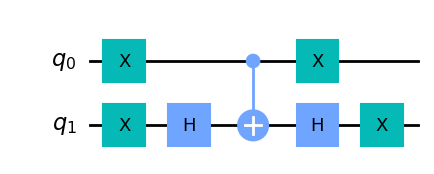

In [12]:
import qiskit
from qiskit import QuantumCircuit

reflection_n_2 = QuantumCircuit(2)
reflection_n_2.x(0)
reflection_n_2.x(1)
reflection_n_2.h(1)
reflection_n_2.cx(0, 1)
reflection_n_2.h(1)

reflection_n_2.x(0)
reflection_n_2.x(1)
reflection_n_2.draw('mpl')

this circuit translates the following operator: 1 - |00><00|

and thus the result is (1 - |00><00|)|q1>|q2>

We are seeking for a circuite that translates (1 - |0...0><0...0|)|q1>...|qn> with dimension n. To do so, we can try to generalize the circuit above, the generalisation gives the following circuit:


![reflection operator](reflection_operator.png)


We write a function that includes the pre and post hadamard gates now. We thus need a Grover operator that is applies to 5 qubits

In [13]:
def Grover_op(circuit, qreg_x):
    circuit.h(qreg_x[0])
    circuit.h(qreg_x[1])
    circuit.h(qreg_x[2])
    circuit.h(qreg_x[3])
    circuit.h(qreg_x[4])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[4])
    circuit.h(qreg_x[4])
    circuit.mcx(qreg_x[0:4], qreg_x[4])
    circuit.h(qreg_x[4])
    circuit.x(qreg_x[0])
    circuit.x(qreg_x[1])
    circuit.x(qreg_x[2])
    circuit.x(qreg_x[3])
    circuit.x(qreg_x[4])
    circuit.h(qreg_x[0])
    circuit.h(qreg_x[1])
    circuit.h(qreg_x[2])
    circuit.h(qreg_x[3])
    circuit.h(qreg_x[4])
    

We create a $G$ block to represent the grover operator such that $G = R \cdot U_f$

In [14]:
G = QuantumCircuit(12, name='G')
uf(G, [0, 1, 2, 3, 4], [5, 6, 7, 8, 9, 10], [11])
Grover_op(G, [0, 1, 2, 3, 4])

***Question 4:***


In [15]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

In [16]:
no_noise = AerSimulator()


In [17]:
#Our circuit will require 5 classical bits, to measure the 5 initial qubits.
counts = {}
for i in range(1, 8):
    counts[i] = 0
circ = QuantumCircuit(12, 5)
circ = circ.compose(Prep)
#State preparation is now done
for k in range(1, 8):
    circ = circ.compose(G)
    meas = circ
    meas.measure(0, 0)
    meas.measure(1, 1)
    meas.measure(2, 2)
    meas.measure(3, 3)
    meas.measure(4, 4)
    meas = transpile(meas, no_noise)
    result = no_noise.run(meas, shots=1024).result()
    counts[k] = result.get_counts(0)

In [18]:
print(counts)

{1: {'00000': 14, '10010': 16, '11011': 9, '00010': 10, '00111': 13, '10100': 9, '01101': 12, '10111': 14, '10011': 11, '01110': 11, '00101': 13, '10101': 8, '11110': 10, '01111': 15, '11100': 7, '01010': 201, '11111': 14, '10110': 8, '00110': 18, '11101': 15, '11001': 12, '10000': 19, '01001': 11, '00100': 18, '01100': 9, '10001': 18, '01000': 246, '11000': 16, '11010': 14, '00001': 19, '00011': 16, '01011': 198}, 2: {'00100': 11, '11100': 19, '00011': 17, '10010': 13, '01100': 11, '11110': 14, '00000': 15, '10100': 18, '00111': 15, '10011': 22, '01110': 8, '11000': 20, '11010': 18, '00001': 15, '00010': 18, '10101': 15, '00101': 16, '10110': 17, '11111': 13, '11101': 18, '00110': 20, '01111': 12, '10111': 7, '01101': 14, '10000': 14, '11001': 20, '10001': 14, '01000': 200, '01011': 200, '11011': 17, '01001': 10, '01010': 183}, 3: {'11000': 18, '11110': 15, '00011': 21, '00100': 17, '00010': 16, '10010': 16, '01110': 16, '10011': 16, '01111': 18, '00111': 17, '10100': 23, '01001': 20,

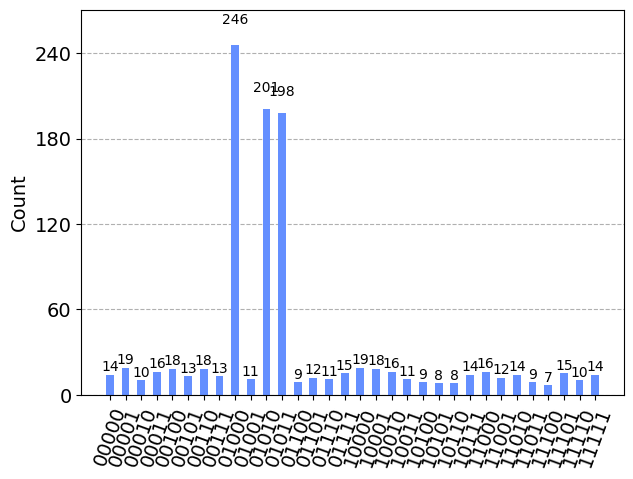

In [19]:
plot_histogram(counts[1])

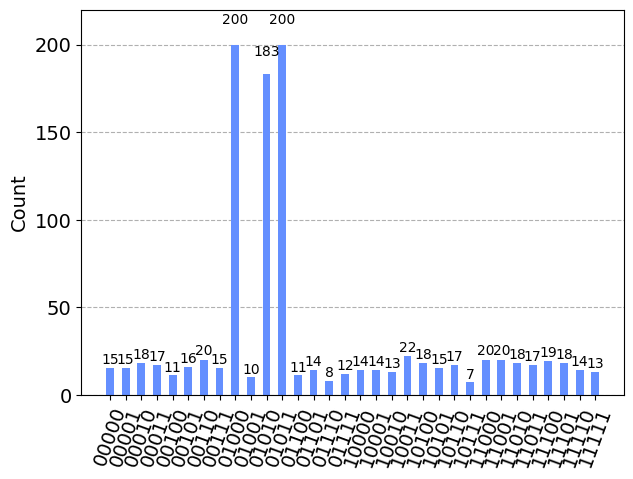

In [20]:
plot_histogram(counts[2])

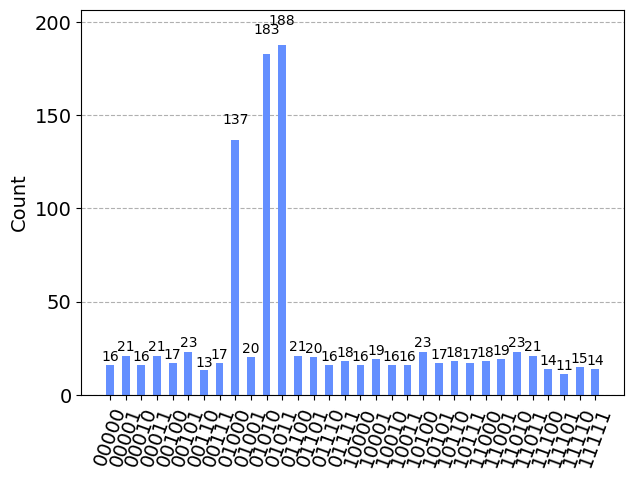

In [21]:
plot_histogram(counts[3])

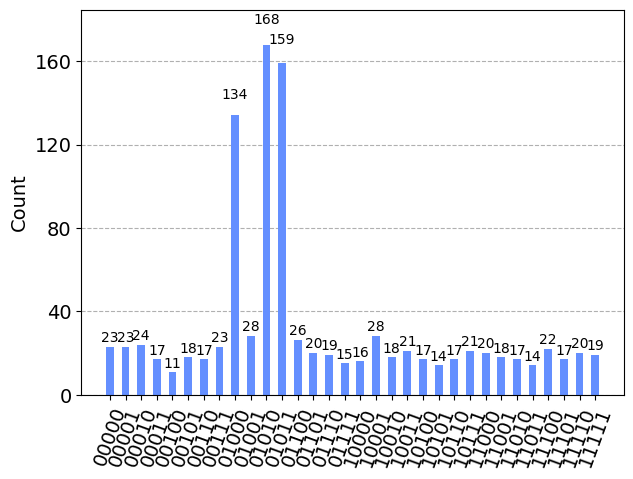

In [22]:
plot_histogram(counts[4])

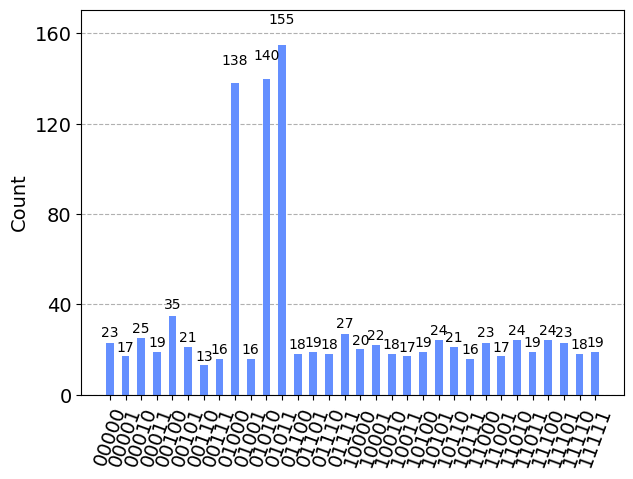

In [23]:
plot_histogram(counts[5])

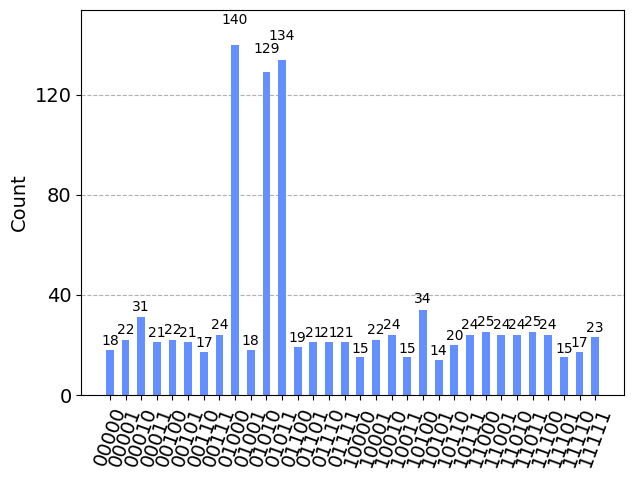

In [24]:
plot_histogram(counts[6])

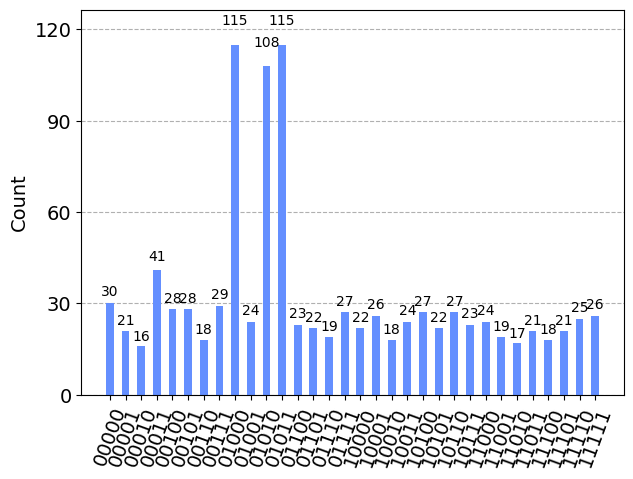

In [25]:
plot_histogram(counts[7])

We can see that each iteration is capable of identifying that there are three solutions, which is to be expected from question 0. We see that the solutions are the same each time, and we also see that the number of 'correct' measurements decreases with each additional iteration of the Grover operator. The 3 measured states are, when their bits are inversed:
$$(11010), (01010), (00010)$$
which is exactly the values we found in question 0.

In [26]:
for i in counts.keys():
    print(i, ":")
    lis = []
    for j in counts[i].keys():
        lis.append(counts[i][j])
    lis = sorted(lis)
    lis.reverse()
    for j in counts[i].keys():
        if counts[i][j] >= lis[2]:
            print(j)

1 :
01010
01000
01011
2 :
01000
01011
01010
3 :
01000
01011
01010
4 :
01000
01011
01010
5 :
01000
01011
01010
6 :
01010
01011
01000
7 :
01010
01000
01011


In [27]:
from qiskit.providers.fake_provider import FakeSherbrooke
device_backend = FakeSherbrooke()
noise = AerSimulator.from_backend(device_backend)

In [28]:
#Our circuit will require 5 classical bits, to measure the 5 initial qubits.
counts_noise = {}
for i in range(1, 4):
    counts_noise[i] = 0
circ1 = QuantumCircuit(12, 5)
circ1 = circ1.compose(Prep)
#State preparation is now done
for k in range(1, 4):
    circ1 = circ1.compose(G)
    meas = circ1
    meas.measure(0, 0)
    meas.measure(1, 1)
    meas.measure(2, 2)
    meas.measure(3, 3)
    meas.measure(4, 4)
    meas = transpile(meas, noise)
    result = noise.run(meas, shots=1024).result()
    counts_noise[k] = result.get_counts(0)

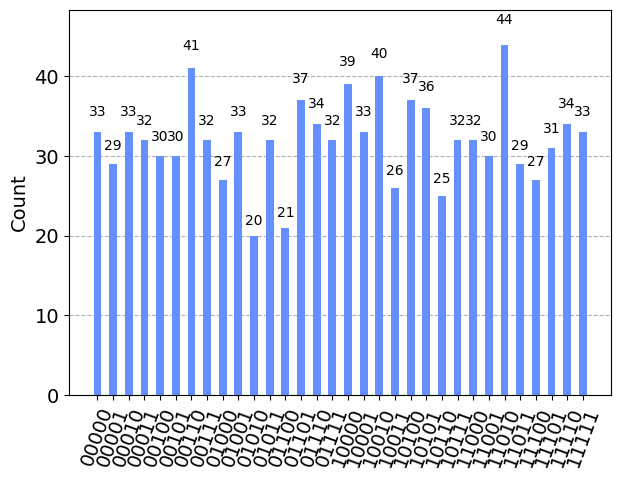

In [29]:
plot_histogram(counts_noise[1])

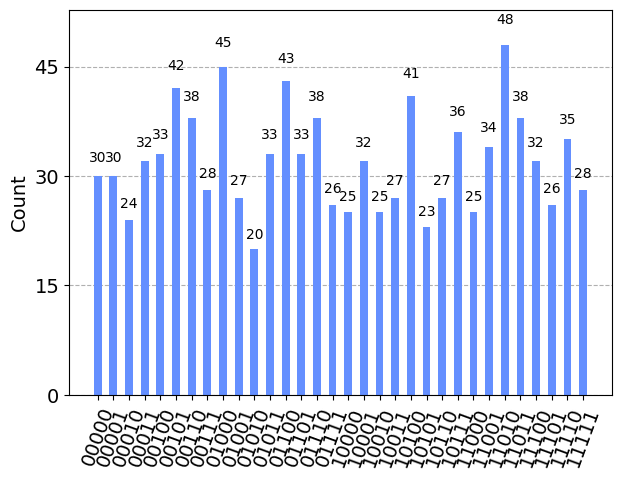

In [30]:
plot_histogram(counts_noise[2])

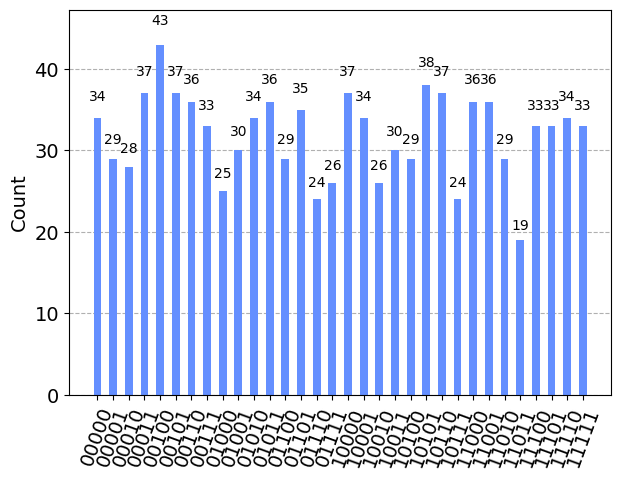

In [31]:
plot_histogram(counts_noise[3])

There is a lot of noise and it is thus almost impossible to find a correct measure. This seems to be due to the quantum noise, as the simulation is very capable of finding the solutions. Next is the runs on the real quantum computers:

In [33]:
pip install qiskit-ibm-runtime

  Obtaining dependency information for qiskit-ibm-runtime from https://files.pythonhosted.org/packages/ae/e3/959f3e610998f861ed5a17291a8055fbdf73976a23ecc20891ebf02de3a8/qiskit_ibm_runtime-0.23.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 6.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for pydantic from https://files.pythonhosted.org/packages/6f/b9/ec44b1394957d5aa8d3a7c33f8304cd7670d10a43a286db56cec086346be/pydantic-2.7.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.1 MB/s eta 0:00:00
  Obtaining dependency information for qiskit>=1.0.0 from https://files.pythonhosted.org/packages/96/63/b9f41b662ce7f3d3b8f770c6b4bcb559ccdafaf454cb740d6063558a855e/qiskit-1.1.0-cp38-abi3-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/6

In [38]:
from qiskit_ibm_runtime import QiskitRuntimeService
TOKEN = '35e880b9e832c0ceba7eda7528d892bdeec2f4f791df1da5745a4a78d3d207edd4192ce4dc23075c51a4b3b181765c635dc0cb6f7996c50db249f25b8ba6574d'
service = QiskitRuntimeService(channel='ibm_quantum', token=TOKEN)

ImportError: cannot import name 'QiskitWarning' from 'qiskit.exceptions' (/opt/homebrew/lib/python3.11/site-packages/qiskit/exceptions.py)

***Question 5:***

In [35]:
import numpy as np

In [36]:
N_solutions = 3
theta0 = np.arcsin(np.sqrt(N_solutions/32))

print(f"theta_0 = {theta0:0.2f}")

theta_0 = 0.31


In [37]:
k = np.floor(np.pi / (4 * theta0))
print(f"k = {k}")

k = 2.0


The formulas used come from the lectures. We use that $\sin{\theta_0} = \sqrt\frac{M}{N}$, where $M$ is the number of solutions to the function, which in our case is 3, and $N$ is the dimension of the space, which in this case, with 5 qubits is $N = 2^5 = 32$. We obtain $\theta_0 = 0.31$ and $k = 2$